
# Nama : Anisa Wulandari
# NIM : 09011282025051
# Kelas : SK5A_Indralaya

# *Klasifikasi Marketing Bank Dengan Menggunakan Algoritma Naive Bayes*


Untuk memenuhi UTS Kecerdasan Buatan, Melalui *Bank Marketing Datasets* dari https://www.kaggle.com/janiobachmann/bank-marketing-dataset. Data tersebut akan digunakan untuk mebangun model klasifikasi dengan target **‘deposit’** menggunakan algoritma **Naive bayes**. Tujuan klasifikasi ini adalah untuk menentukan atau memprediksi apakah seseorang akan melakukan deposit ke dalam bank.

### *Import Library*

Berikut adalah library yang diperlukan selama penyelesaian UTS ini.

In [7]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf

### *Import Dataset*

Data yang dipakai terdapat 17 atribut, dengan atribut **‘deposit’** sebagai kelas label atau target yang terdiri atas kelas **‘yes’** dan **‘no’**. Berikut merupakan *bank marketing dataset* yang berisi data kampanye pemasaran bank.
<br>
1. **age**: Usia calon nasabah. <br>
2. **job**: Pekerjaan calon nasabah (admin, technician, services, management, retired, blue-collar, unemployed, entrepreneur, housemaid, unknown, self-employed, student).<br>
3. **marital**: Status pernikahan nasabah (married, single, divorce).  <br>
4. **education**: Tingkat pendidikan nasabah (secondary, tertiary, primary, unknown). <br>
5. **default**: Memiliki kredit secara default atau tidak (yes, no). <br>
6. **balance**: Jumlah saldo nasabah . <br>
7. **housing**: Memiliki cicilan rumah atau tidak (yes, no). <br>
8. **loan**: Memiliki pinjaman pribadi atau tidak (yes, no). <br>
9. **contact**: Alat komunikasi yang digunakan (telephone, cellular, unknown). <br>
10. **day**: Terakhir dihubungi dalam hari. <br>
11. **month**: Terakhir dihubungi dalam bulan pada satu tahun (jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec). <br>
12. **duration**: Lama durasi dihubungi dalam detik. <br>
13. **campaign**: Jumlah kontak yang dilakukan kepada nasabah selama kampanye. <br>
14. **pdays**: Jumlah hari yang berlalu setelah nasabah terakhir kali dihubungi dari kampanye sebelumnya. <br>
15. **previous**: Jumlah kontak yang dilakukan kepada nasabah sebelum kampanye. <br>
16. **poutcome**:  Hasil dari kampanye pemasaran sebelumnya (unknown, other, failure, success). <br>
17. **deposit**: Nasabah melakukan melakukan deposit atau tidak (yes, no).

In [2]:
# Import Data 
df_bm = pd.read_csv('https://raw.githubusercontent.com/hafizhfajar/Klasifikasi_Marketing_Bank_DS0119/master/Dataset/bank.csv')

# Show 5 first Row
df_bm.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Menampilkan Informasi Data

#### Menampilkan Informasi Umum

In [3]:
# Prints the Dataset Information
df_bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Berdasarkan informasi di atas,dapat  diketahui bahwa terdapat 11162 data dengan 2 tipe data yaitu numerik (7 atribut) dan objek (10 atribut).
- **Numerik**: age, balance, day, duration, campaign, pdays, previous
- **Objek**: job, marital, education, default, housing, loan, contact, month, poutcome, deposit.


#### Menampilkan Informasi Berdasarkan Statistik

In [4]:
# Prints Descriptive Statistics
df_bm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


#### Menampilkan Jumlah Data Tiap Kelas

In [5]:
# Menampilkan jumlah kelas pada atribut deposit
cls = df_bm['deposit'].value_counts()
print(cls)

no     5873
yes    5289
Name: deposit, dtype: int64


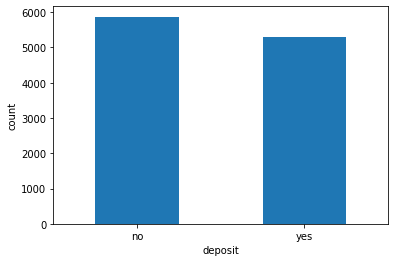

In [6]:
df_bm['deposit'].value_counts().plot(kind='bar', rot=0);
plt.xlabel("deposit")
plt.ylabel("count");

*Bar chart* di atas merupakan visualisasi jumlah data pada setiap kelas untuk atribut deposit.

## *Preprocessing* Data

Tujuan dari tahapaan ini adalah untuk membuat data menjadi ideal sebelum di proses. *Preprocessing* data dapat mengatasi beberapa masalah yaitu:
1. Data Tidak Lengkap
    - Data hilang / Kosong
    - Kekurangan atribut tertentu atau atribut yang sesuai
    - Hanya berisi data agregat
2. Noise
    - Mengandung kesalahan
    - Mengandung data yang *outlier*
3. Tidak Konsisten
    - Mengandung perbedaan dalam kode atau nama

#### Mengecek Data Hilang/Kosong

Mengecek apakah terdapat data yang kosong atau tidak. Jika terdapat data kosong maka data tersebut akan diisi dengan median berdasarkan atributnya.

In [8]:
# Check for Missing Values
df_bm.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Berdasarkan data di atas diketahui bahwa tidak terdapat data yang kosong dan siap digunakan, sehingga tidak perlu menghitung median.

#### Encode Categorical Data

Seperti yang telah diketahui bahwa terdapat dua tipe data yaitu numerik dan objek. Fungsi pembelajaran mesin dalam sklearn mengharapkan atribut yang digunakan adalah atribut dengan tipe data numerik. Untuk mengonversinya, perlu menggunakan *encoding* yang mengacu pada proses transformasi tipe data objek menjadi bentuk numerik.

In [9]:
# Encoder
encoder = OneHotEncoder(sparse=False)

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_bm[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']]))
df_encoded.columns = encoder.get_feature_names(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])
df_bm['deposit'].replace('no',0, inplace=True)
df_bm['deposit'].replace('yes',1, inplace=True)

# Replace Categotical Data with Encoded Data
df_bm.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'] ,axis=1, inplace=True)
df_encoded = pd.concat([df_bm, df_encoded], axis=1)

# Show Encoded Dataframe
df_encoded

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,56,45,5,1467,1,-1,0,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41,1270,5,1389,1,-1,0,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,55,2476,5,579,1,-1,0,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,54,184,5,673,2,-1,0,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,39,733,16,83,4,-1,0,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,32,29,19,156,2,-1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,43,0,8,9,2,172,5,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### Set Feature and Target

Langkah ini untuk menentukan atribut-atribut yang digunakan sebagai feature dan sebagai target

###### Select Feature

In [15]:
# Select Features
feature = df_encoded.drop(['deposit'], axis=1)
feature

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,56,45,5,1467,1,-1,0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41,1270,5,1389,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,55,2476,5,579,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,54,184,5,673,2,-1,0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,39,733,16,83,4,-1,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,32,29,19,156,2,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,43,0,8,9,2,172,5,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


###### Select Target

In [16]:
# Select Target
target = df_encoded['deposit']
target

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

### Set Training and Testing Data

Langkah ini digunakan untuk membagi data ke dalam data train dan data test dengan perbandingan 70:30 sebelum dilakukan klasifikasi

In [12]:
# Set Training and Testing Data (70:30)
X_train, X_test, y_train, y_test  = train_test_split(feature , target, shuffle = True, test_size=0.3, random_state=100)

# Show the Training and Testing Data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7813, 51)
(3349, 51)
(7813,)
(3349,)


In [13]:
# Print data test
X_test

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1402,50,414,3,707,1,302,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9326,25,-289,13,56,2,-1,0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3380,84,81204,1,390,1,94,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7413,45,999,16,656,2,-1,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10309,30,19358,19,258,2,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9318,34,34,30,379,1,-1,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10290,42,2003,17,177,3,-1,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6965,61,89,28,154,1,181,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
666,59,1634,5,836,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
# Print label test
y_test

1402     1
9326     0
3380     1
7413     0
10309    0
        ..
9318     0
10290    0
6965     0
666      1
5235     1
Name: deposit, Length: 3349, dtype: int64

## Kesimpulan

Berdasarkan hasil akhir yang didapatkan selama proses klasifikasi, output dari pengerjaan uts ini berfokus pada analisis kumpulan data Pemasaran Bank yang berisi data atau informasi tentang nasabah dan bertujuan untuk mendapatkan wawasan yang berguna dari data tersebut dan memprediksi apakah nasabah baru akan menerima tawaran deposit atau tidak.